<h1 align="center" style="color:#79c6fc; font-family:Georgia, serif;">
  🎓 Student Performance Analysis
</h1>

<h3 align="center">
  <span style="color:white; background-color:#ff6f61; padding:4px 10px; border-radius:5px;">EDA</span>
  <span style="color:white; background-color:#1e88e5; padding:4px 10px; border-radius:5px;">KPI Analysis</span>
  <span style="color:white; background-color:#43a047; padding:4px 10px; border-radius:5px;">Data Visualization</span>
</h3>

---

### 📌 Introduction

This notebook presents a focused **Exploratory Data Analysis (EDA)** on student academic performance. It investigates how various factors — including **gender**, **school type**, **study habits**, **family background**, and **lifestyle choices** — impact final academic results.

Using **key performance indicators (KPIs)** and **interactive visualizations**, we aim to extract actionable insights to support data-driven improvements in education strategy and student support systems.

---




Dataset Link:
http://kaggle.com/datasets/larsen0966/student-performance-data-set/data

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

## <div style="text-align: left; background-color:#73a5c7; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">Analysis Reports</div>

* &nbsp; **[School Comparidion Report](#SCHOOL-COMPARISION-REPORT)**

* &nbsp; **[Student Performance Analysis Report](#Student-Performance-Analysis-Report)**

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#f0e9d5; font-family: Trebuchet MS; border-left: 5px solid #4CAF50;; padding: 13px;  color: #333; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">LOAD LIBRARY & DATASET</div>

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from scipy.stats import gaussian_kde
from plotly.subplots import make_subplots
import pprint

In [2]:
data = pd.read_csv("../datasets/student-por.csv")

In [3]:
data.shape

(649, 33)

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#f0e9d5; font-family: Trebuchet MS; border-left: 5px solid #4CAF50;; padding: 13px;  color: #333; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">DATA OVERVIEW</div>

In [4]:
#### to dispaly all feature without wrap in data.head()
pd.set_option('display.max_columns', None)

In [5]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [7]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [9]:
def Columns_Info(data):
    """
    Display a table showing the number of unique values for each column in the DataFrame.
    """
    unique_counts = {
        "Column": data.columns,
        "Unique Values": [data[col].nunique() for col in data.columns],
        'null values': [data[col].isna().sum() for col in data.columns]
    }
    
    result_df = pd.DataFrame(unique_counts)
    display(result_df)
Columns_Info(data)

,Column,Unique Values,null values
0,school,2,0
1,sex,2,0
2,age,8,0
3,address,2,0
4,famsize,2,0
5,Pstatus,2,0
6,Medu,5,0
7,Fedu,5,0
8,Mjob,5,0
9,Fjob,5,0


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#f0e9d5; font-family: Trebuchet MS; border-left: 5px solid #4CAF50;; padding: 13px;  color: #333; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">DATA ANALYSIS</div>

In [10]:
def CountPlot(column, title=None, color=None):
    g3 = data.groupby(column, as_index=False)['G3'].mean().round(2)

    # Title fallback
    plot_title = title if title else f'🎓 Average Final Grade (G3) by {column}'

    # Color fallback
    color = color if color is not None else px.colors.qualitative.Set2

    fig = px.bar(
        g3,
        x=column,
        y='G3',
        color=column,
        text=g3['G3'].round(2),
        color_discrete_sequence=color,
        title=plot_title,
    )

    # Layout adjustments
    fig.update_traces(textposition='outside')
    fig.update_layout(
        xaxis_title=column,
        yaxis_title='Average G3 (Final Grade)',
        showlegend=False,
        height=500,
        width=600
    )

    fig.show()

    


In [11]:
CountPlot('sex',color=['#17becf', '#bcbd22'], title= "Average G3 by Gender")

In [12]:
CountPlot('famsize',title="Average final Grade (G3) by Family Size")

In [13]:
CountPlot('school', color=['#2ca02c', '#d62728'])

## **let's find out reason of GP 's student for higher rank**

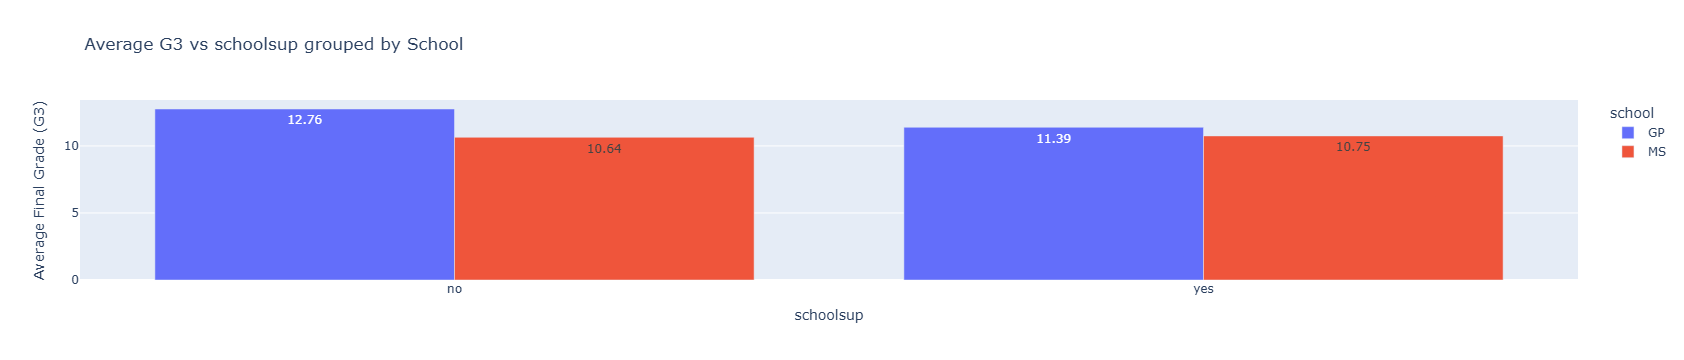

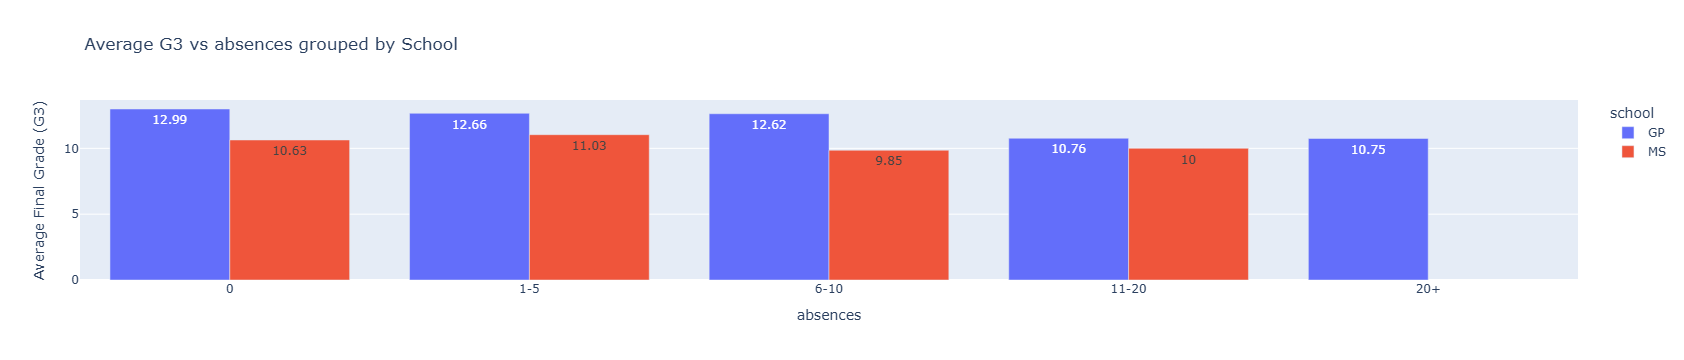

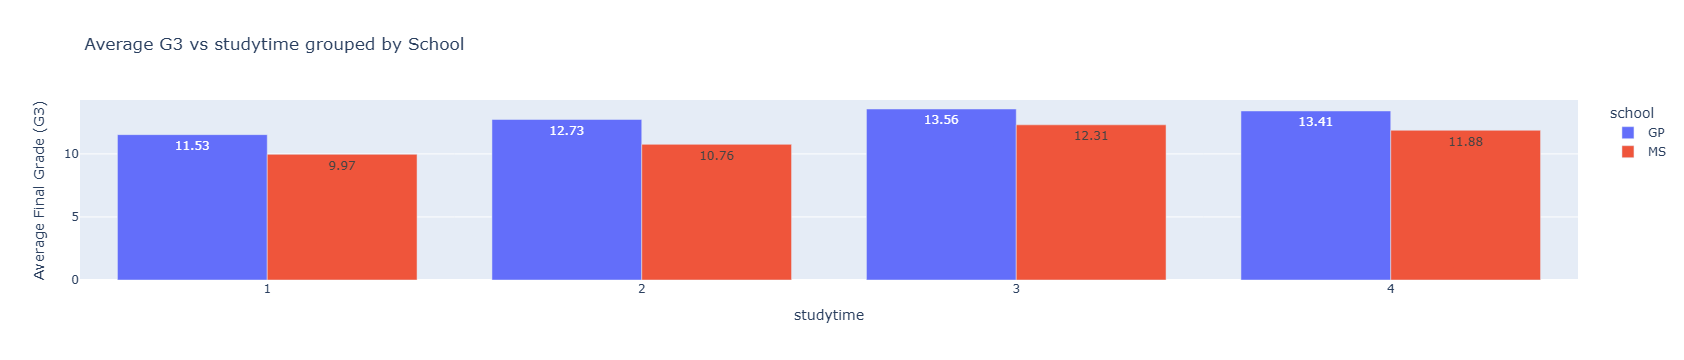

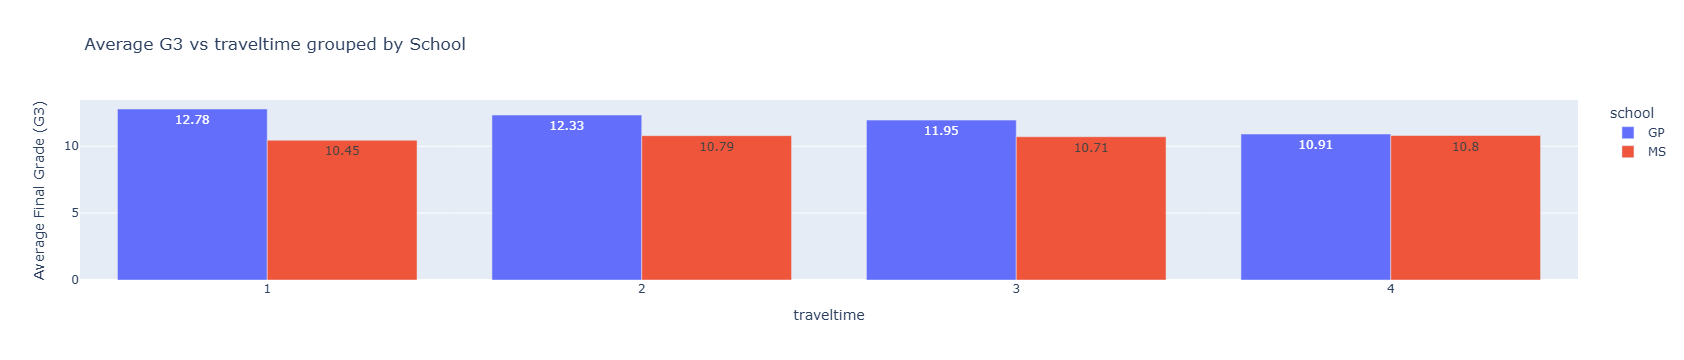

In [14]:
columns = ['schoolsup','absences','studytime','traveltime']

data['absences_bin'] = pd.cut(data['absences'], bins=[-1,0,5,10,20, 100], labels=['0','1-5','6-10','11-20', '20+'])

for col in columns:
    plot_col = col
    if col == 'absences':
        plot_col = 'absences_bin'
    
    # Aggregate mean G3 by category and school
    grouped = data.groupby([plot_col, 'school'], observed=True, as_index=False)['G3'].mean()
    
    fig = px.bar(
        grouped,
        x=plot_col,
        y='G3',
        color='school',
        text= grouped['G3'].round(2),
        barmode='group',
        title=f'Average G3 vs {col} grouped by School',
        labels={plot_col: col, 'G3': 'Average Final Grade (G3)'}
    )

    fig.update_layout(width = 1000)
    fig.show()



<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#f0e9d5; font-family: Trebuchet MS; border-left: 5px solid #4CAF50;; padding: 13px;  color: #333; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">SCHOOL COMPARISION REPORT</div>

## 📊 Insights from Grouped Bar Charts (GP vs MS)

- Based on the visual analysis, **students from GP (Gabriel Pereira) consistently outperform those from MS (Mousinho da Silveira)** across all observed factors.
- Key influencing factors where GP students show stronger performance include:
  - **School support (schoolsup)**
  - **Travel time**
  - **Study time**
  - **Absences**

These factors appear to play a significant role in academic success and are more favorable among GP students.

---

## 🏫 Recommendations for MS School

To improve student performance, **MS school should consider**:

- ✅ **Providing additional school support programs** (e.g., tutoring, mentoring, academic resources).
- 🚌 **Reducing students' travel time**, possibly by:
  - Improving transportation options
  - Encouraging local enrollments
  - Offering remote support or hybrid learning
- ⏱️ **Encouraging consistent study habits** by promoting structured study schedules.
- 📉 **Monitoring and minimizing absences** through better engagement, parental communication, and support systems.

Improving these key areas could help close the performance gap between MS and GP schools.



### Below Commented Feature has  not any Analysis. check by uncomment 

In [15]:
# CountPlot('Pstatus',title="Average G3 by Perents Status {A : Apart; T : together}") 

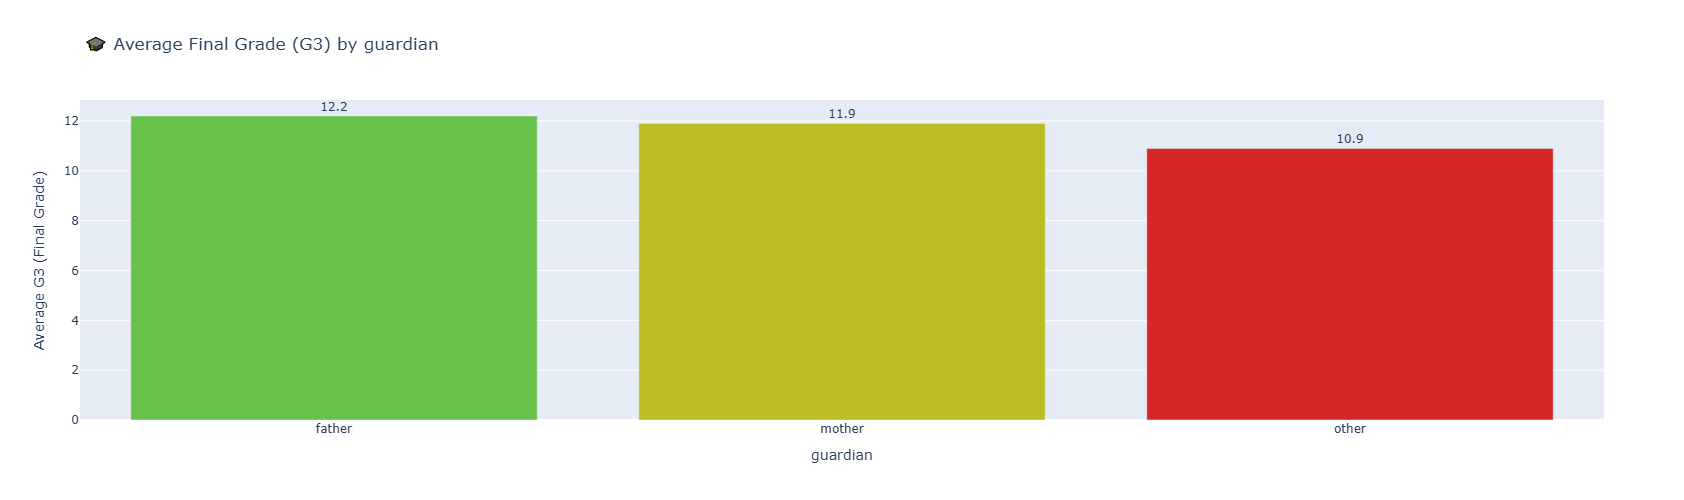

In [16]:
CountPlot('guardian',color= ['#66c24a', '#bcbd22','#d62728'])

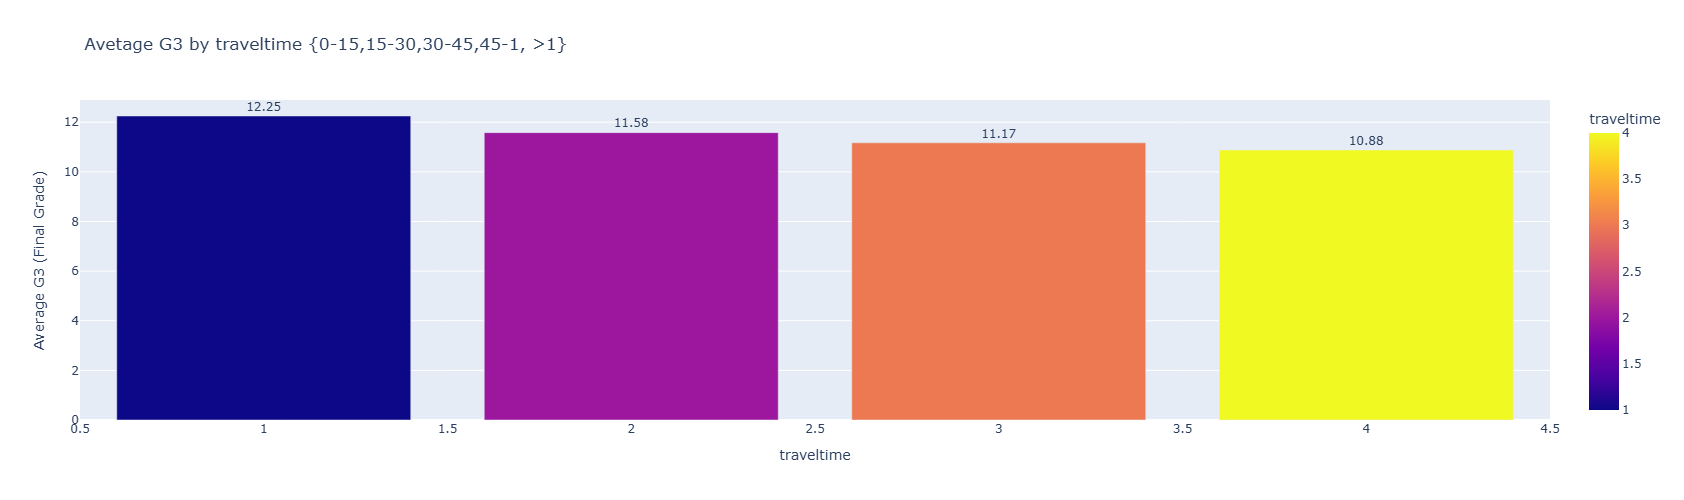

In [17]:
CountPlot('traveltime', title="Avetage G3 by traveltime {0-15,15-30,30-45,45-1, >1}")

In [18]:
correlation = data['traveltime'].corr(data['G3'])
print("Correlation between traveltime and G3:", correlation)

Correlation between traveltime and G3: -0.12717296675842063


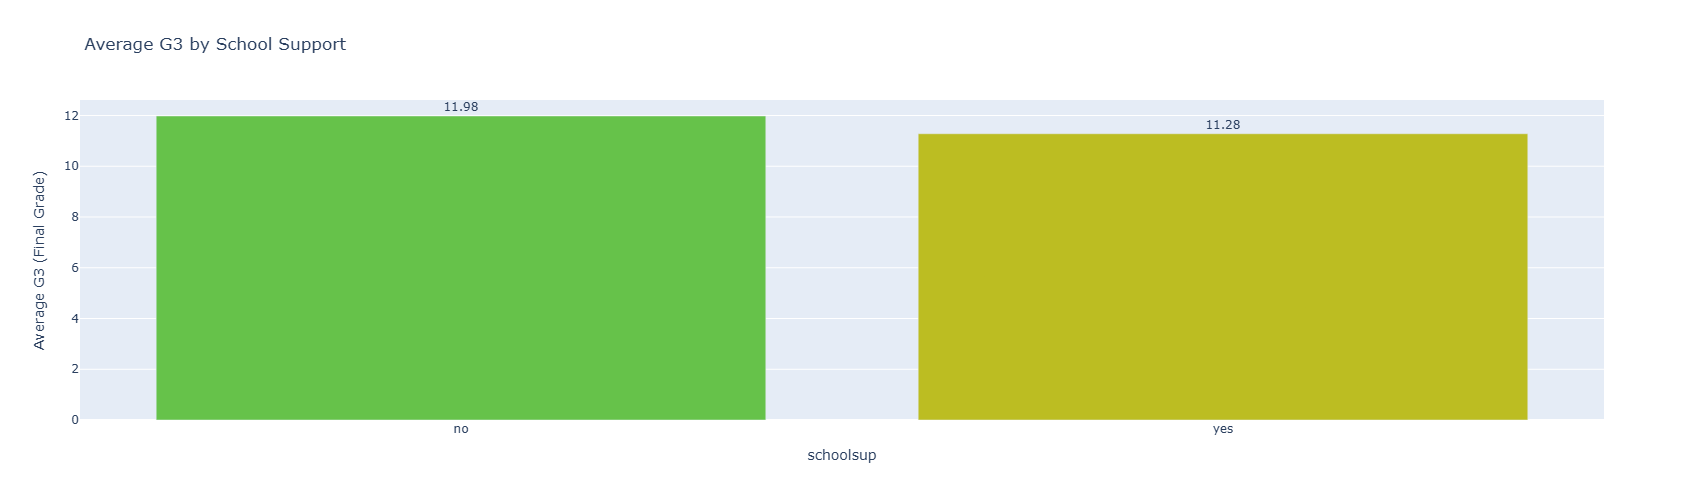

In [19]:
CountPlot('schoolsup',color=['#66c24a','#bcbd22'], title="Average G3 by School Support")

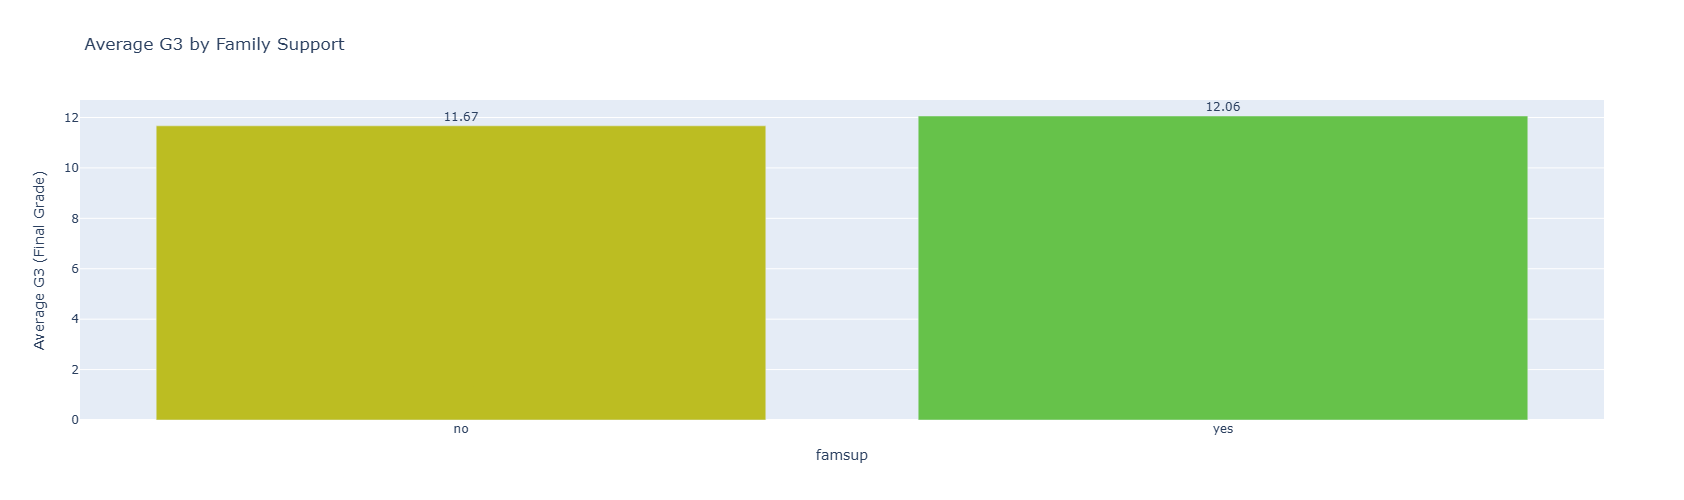

In [20]:
CountPlot('famsup',color=['#bcbd22','#66c24a'],title="Average G3 by Family Support")

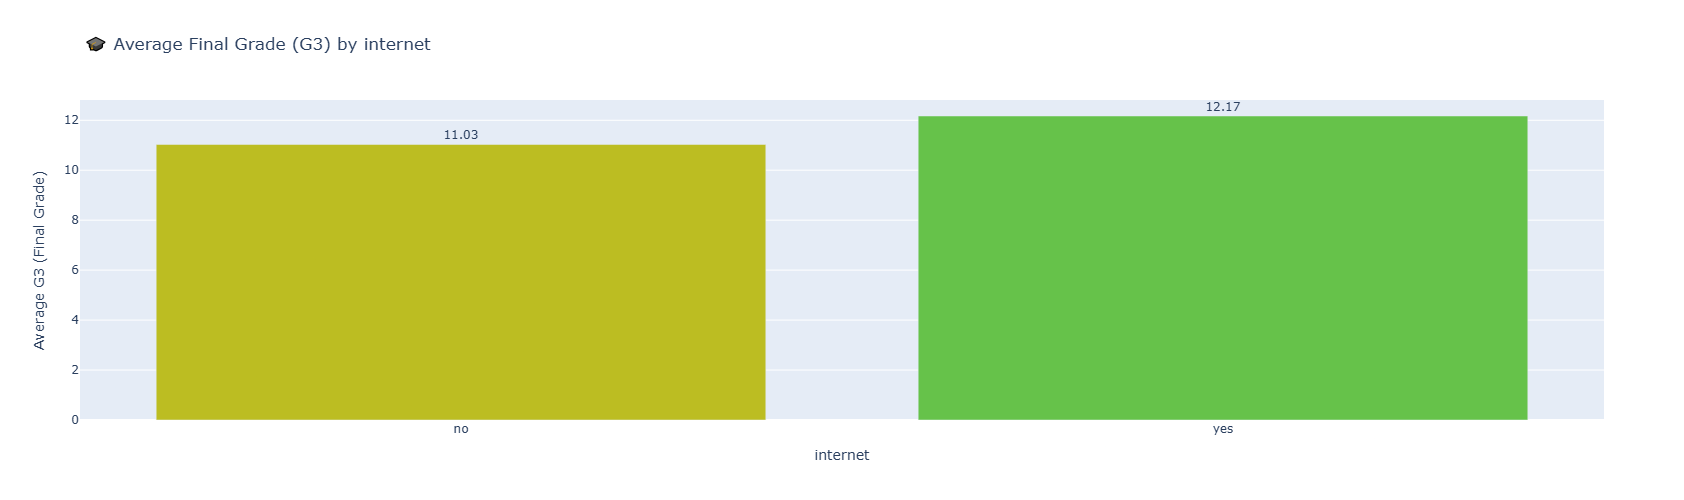

In [21]:
CountPlot('internet',color=['#bcbd22','#66c24a'])

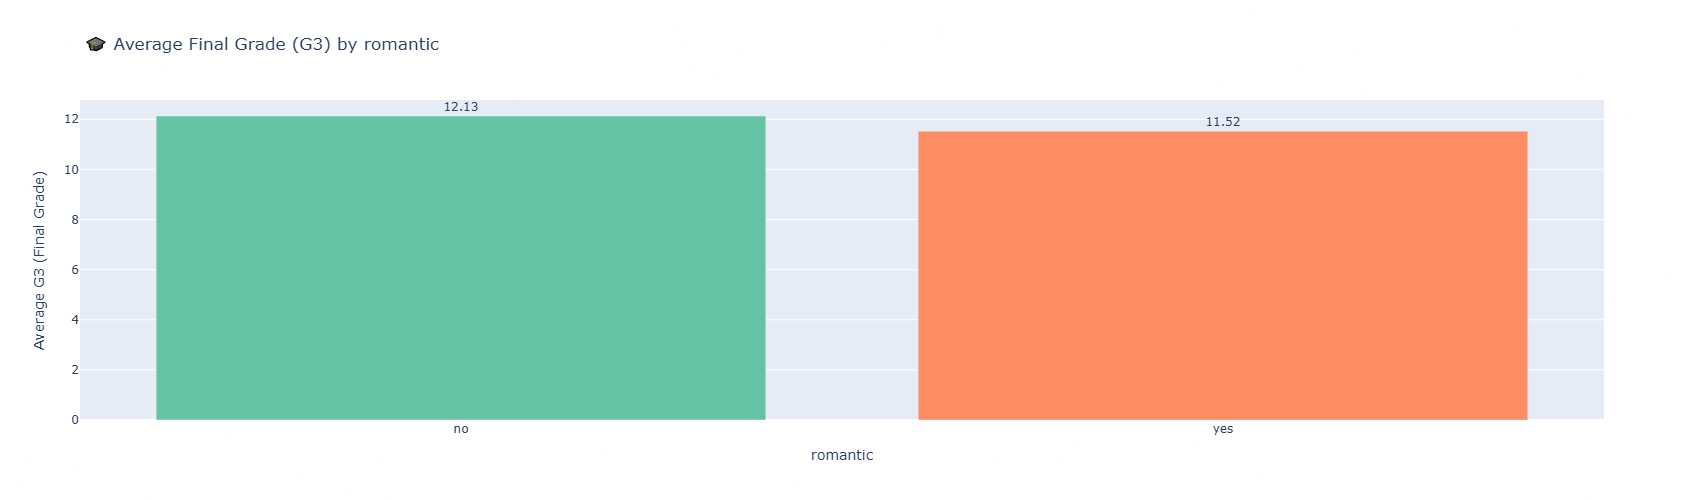

In [22]:
CountPlot('romantic')

0 --> No education    
1 --> 4th std    
2--> 5 to 9 std               
3--> secendary edu                           
4--> above secendary       

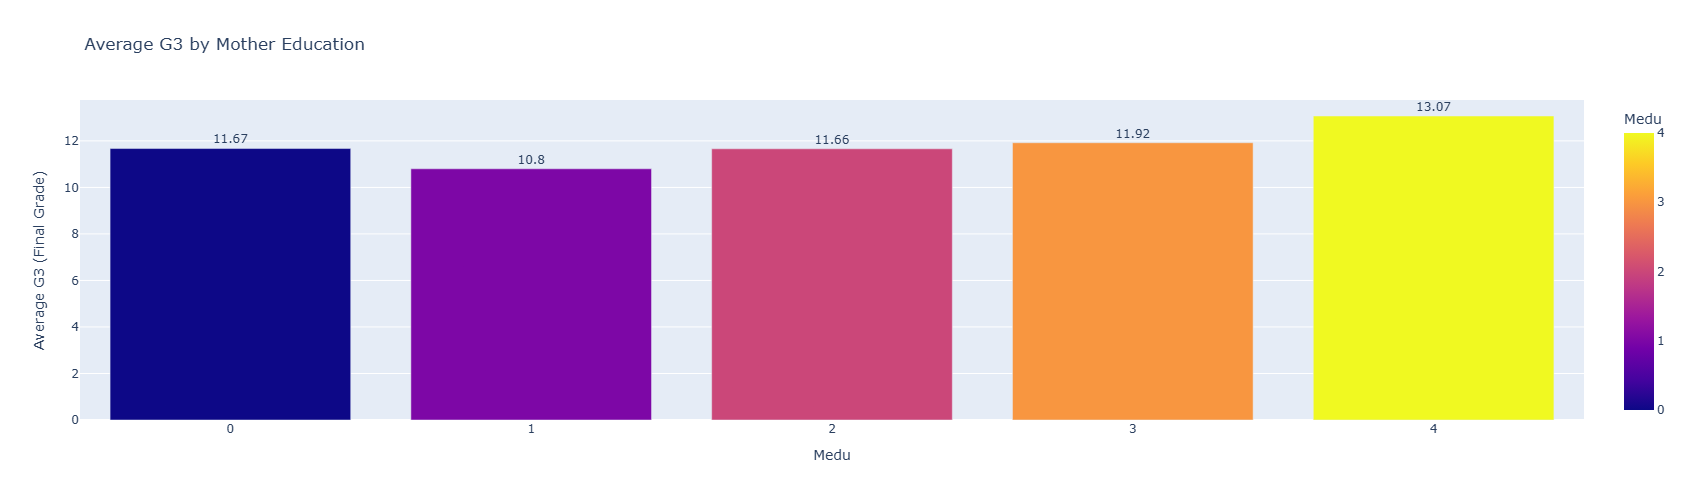

In [23]:
CountPlot('Medu',title="Average G3 by Mother Education")  

In [24]:
correlation = data['Medu'].corr(data['G3'])
print("Correlation between Mother education and G3:", correlation)

Correlation between Mother education and G3: 0.2401507565735952


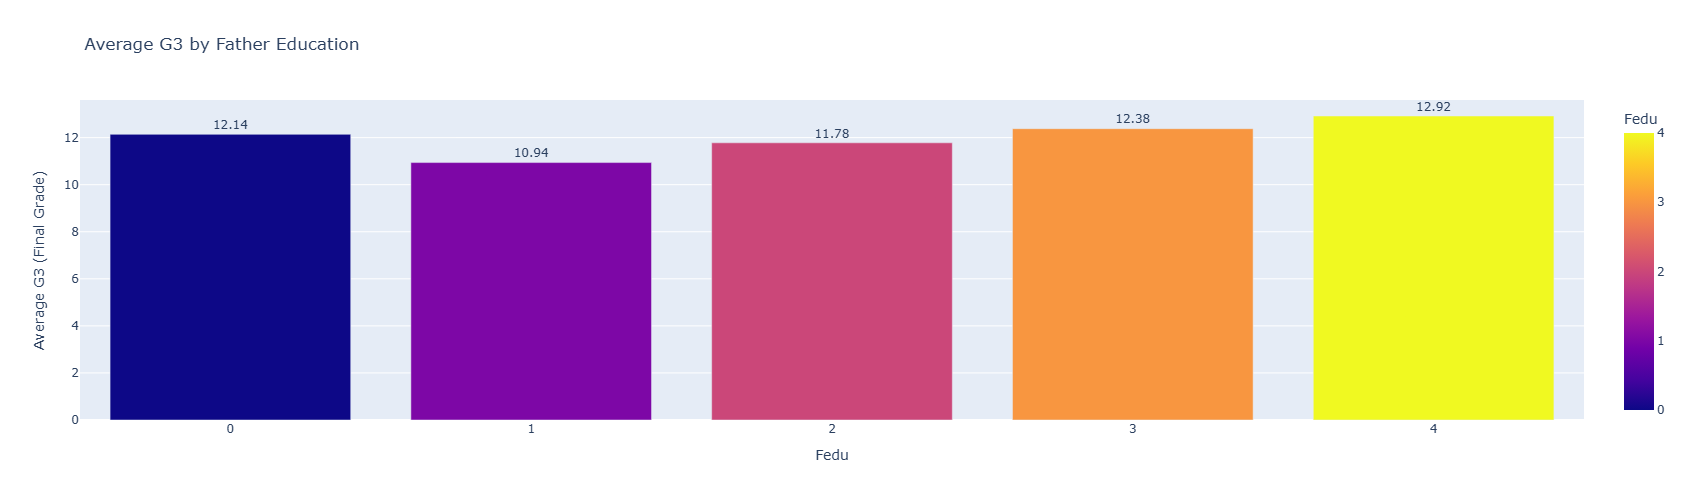

In [25]:
CountPlot('Fedu',title="Average G3 by Father Education")

In [26]:
correlation = data['Fedu'].corr(data['G3'])
print("Correlation between Father education and G3:", correlation)

Correlation between Father education and G3: 0.211799679114452


In [27]:
data[data['age'] == 22]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,absences_bin
279,GP,M,22,U,GT3,T,3,1,services,services,other,mother,1,1,3,no,no,no,no,no,no,yes,yes,5,4,5,5,5,1,12,7,8,5,11-20


### Here we do not consider age feature because it is not normaly distributed 

In [28]:
# CountPlot('age')

### weekly study time   
numeric: 1 - <2 hours,   
2 - 2 to 5 hours,   
3 - 5 to 10 hours,   
4 - >10 hours

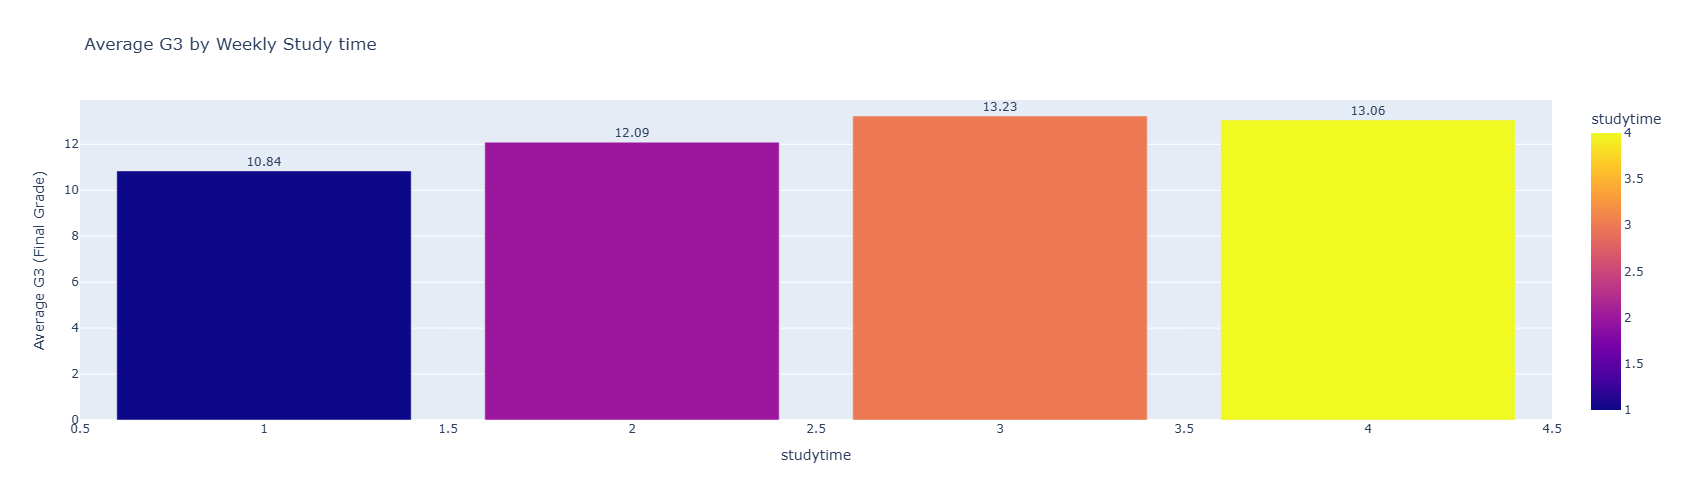

In [29]:
CountPlot('studytime', title="Average G3 by Weekly Study time")

In [30]:
correlation = data['studytime'].corr(data['G3'])
print("Correlation between studytime and G3:", correlation)

Correlation between studytime and G3: 0.2497886899988628


### number of past class failures             
0 --> 0                 
1 ---> 1                                                       
2 --> 2                                                                                    
More than 3 --> 4                  




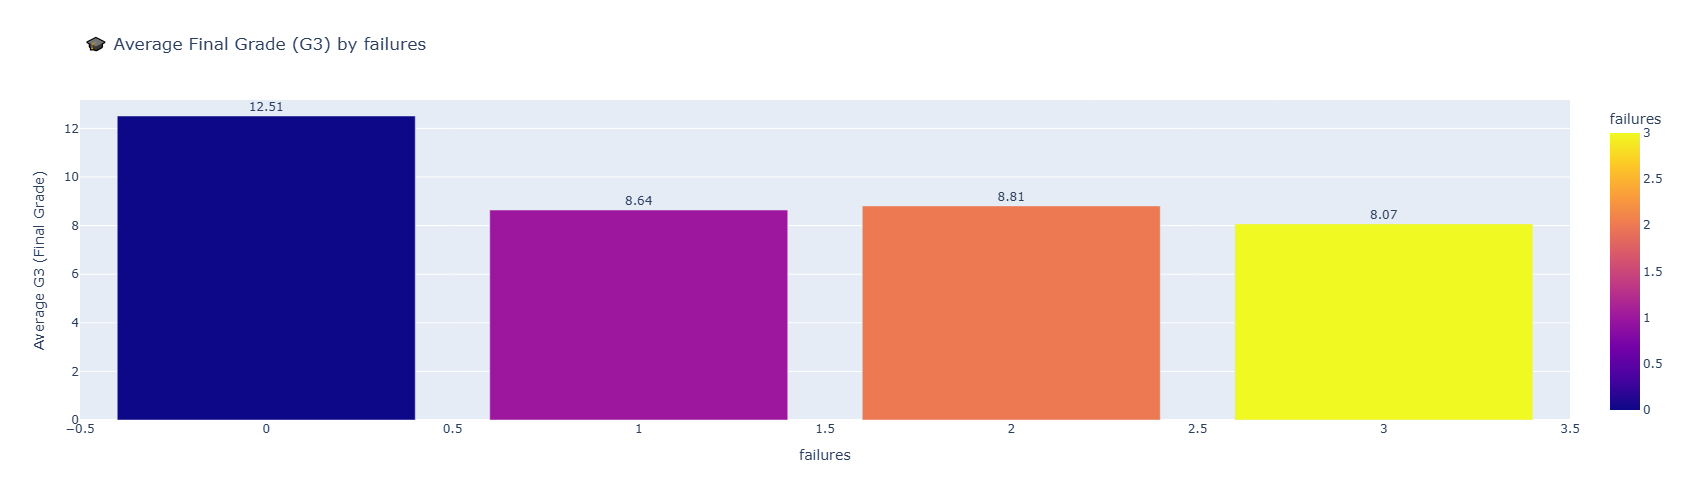

In [31]:
CountPlot('failures')

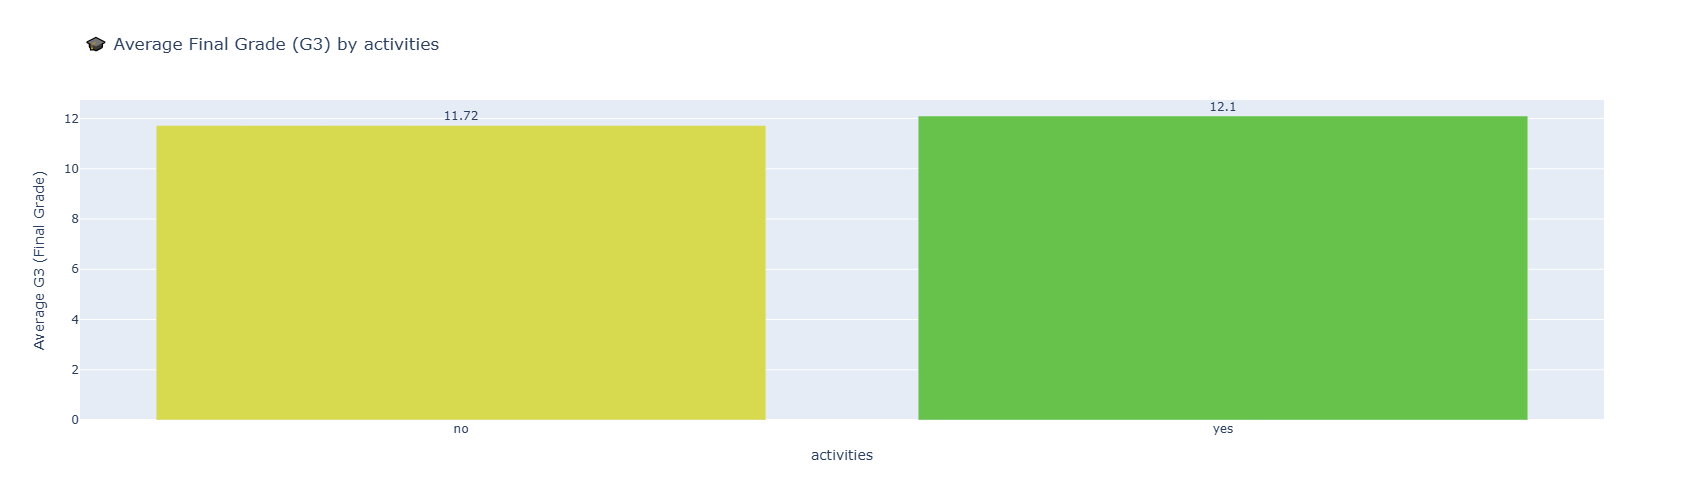

In [32]:
CountPlot('activities', color=['#d7d94f','#66c24a'])

### **Rating range (1 to 5)**

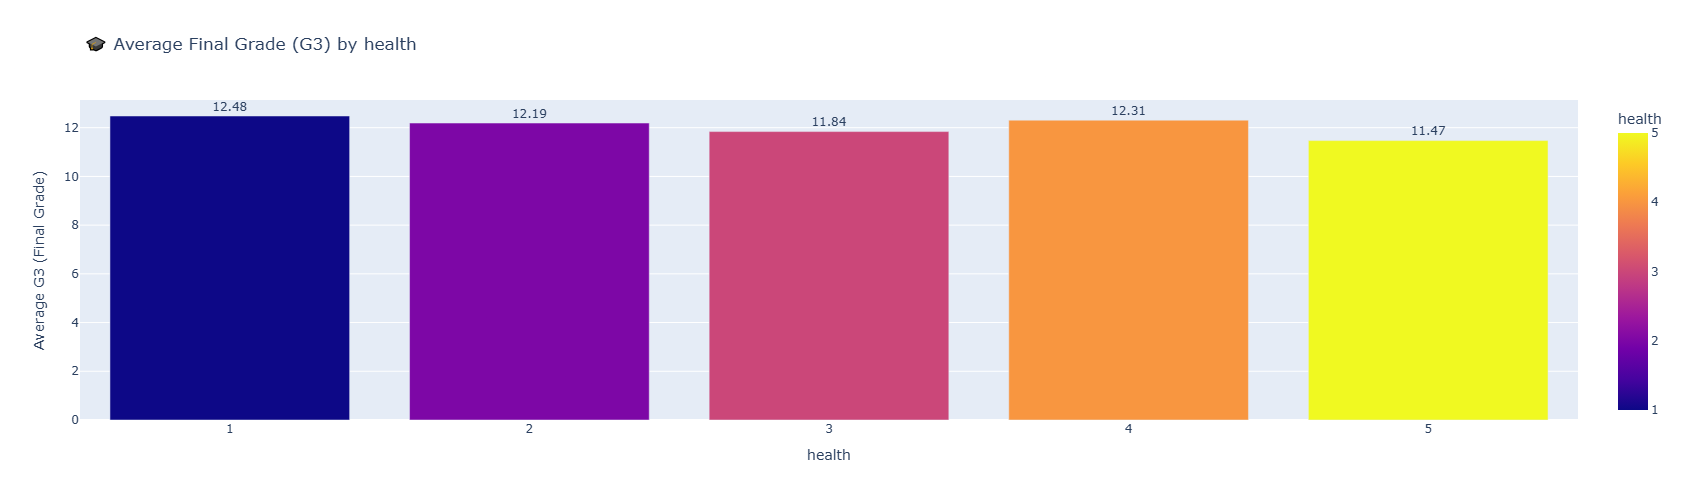

In [33]:
CountPlot('health')  

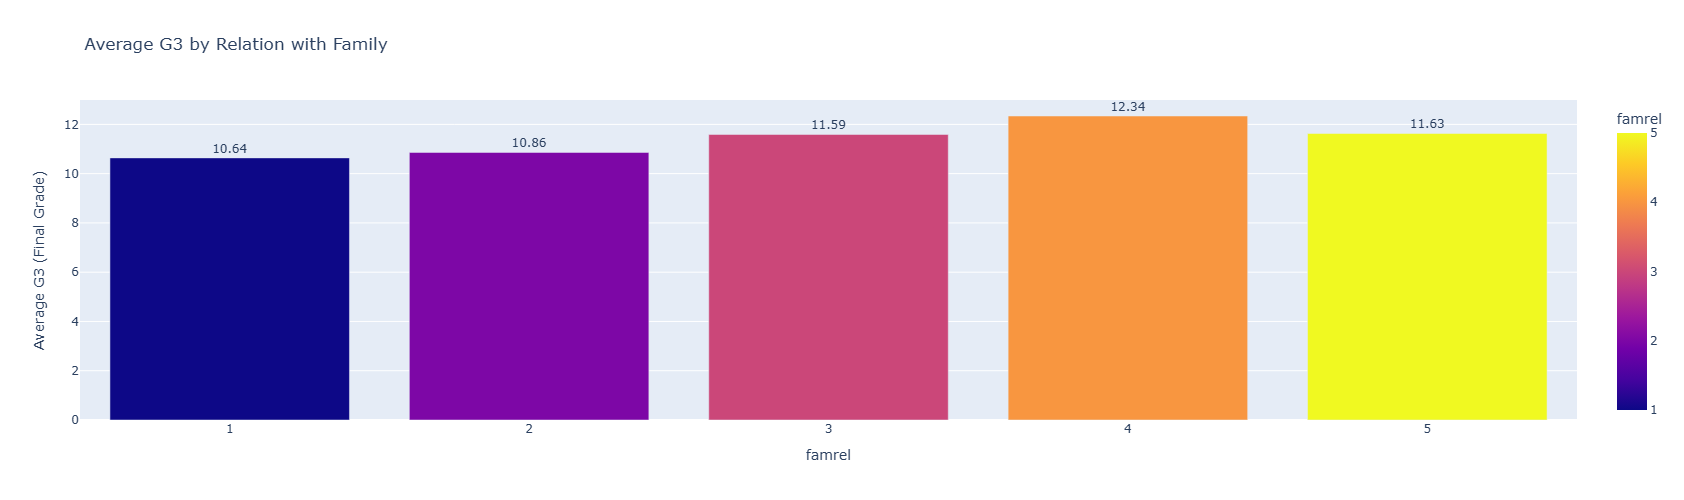

In [34]:
CountPlot('famrel',title="Average G3 by Relation with Family")

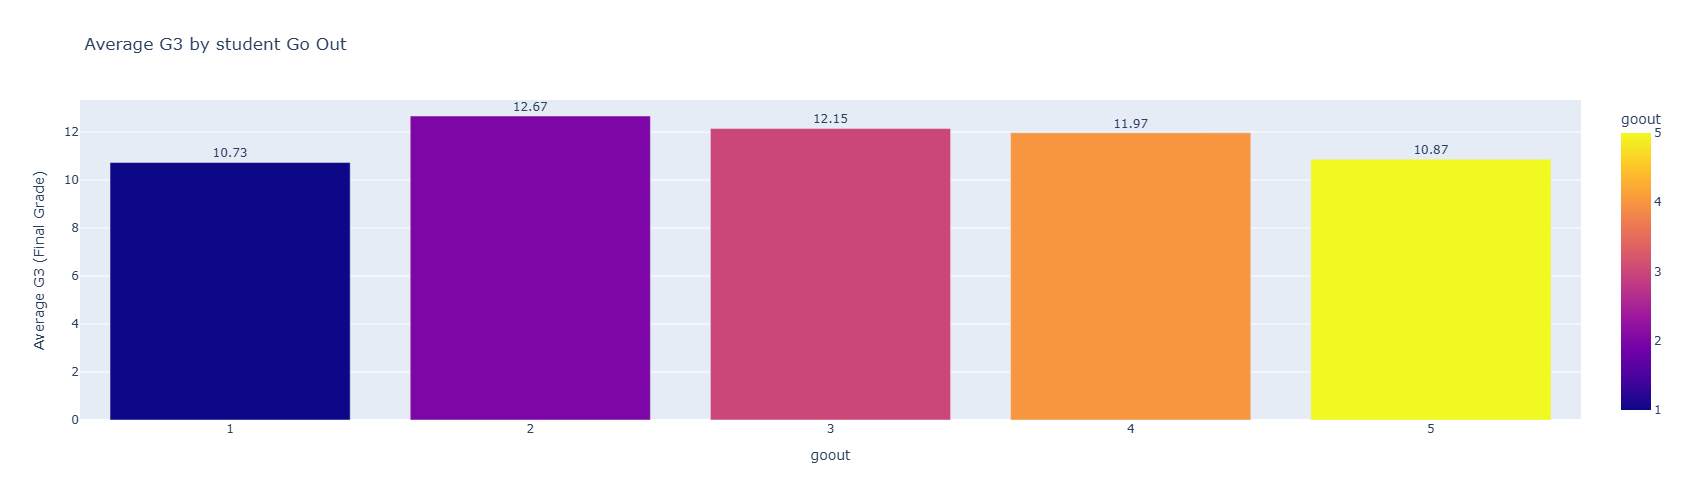

In [35]:
CountPlot('goout',title="Average G3 by student Go Out ")

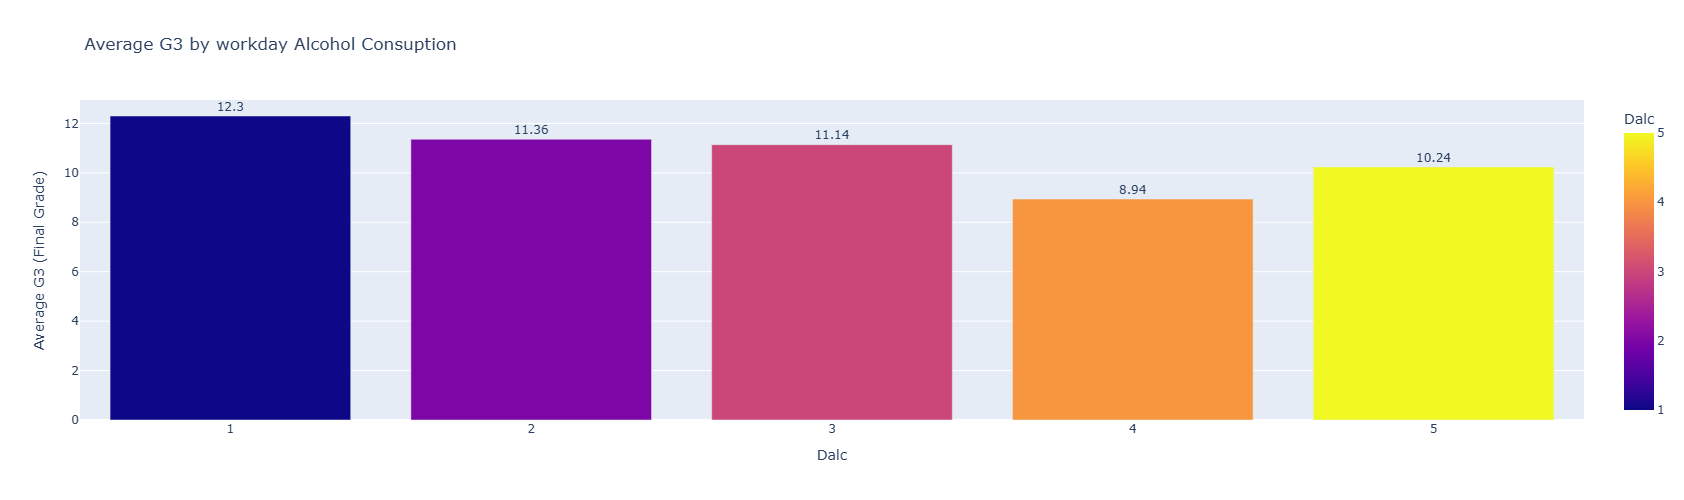

In [36]:
CountPlot('Dalc',title="Average G3 by workday Alcohol Consuption")

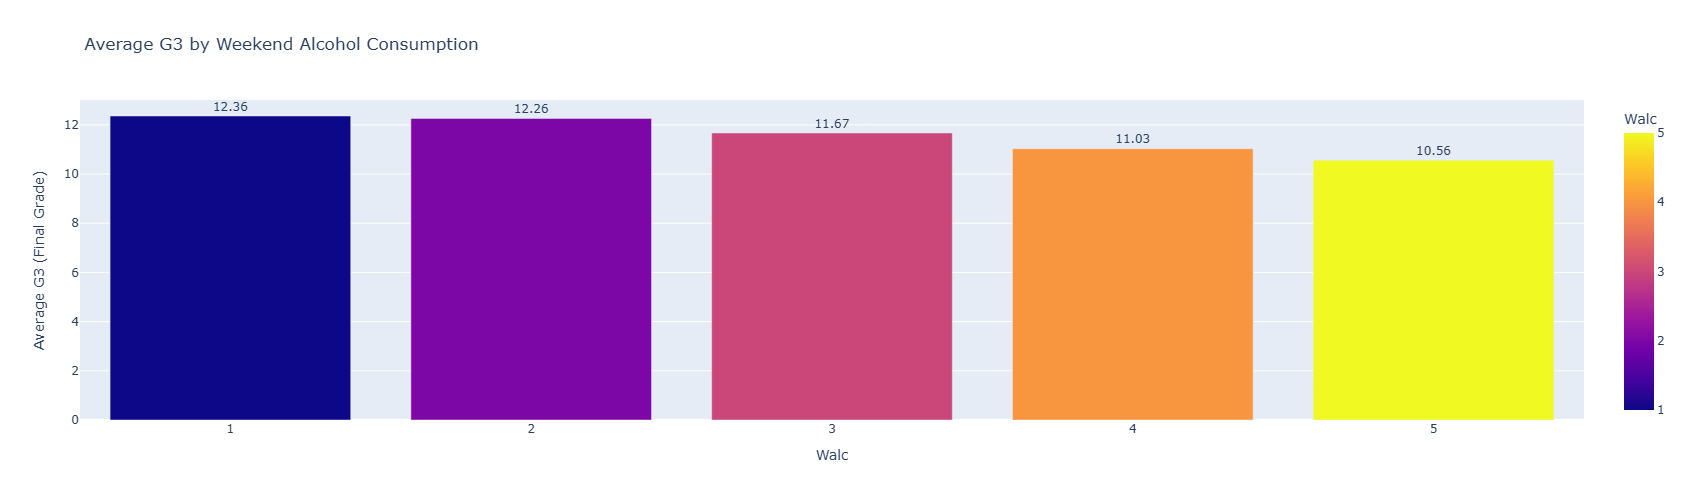

In [37]:
CountPlot('Walc',title="Average G3 by Weekend Alcohol Consumption")

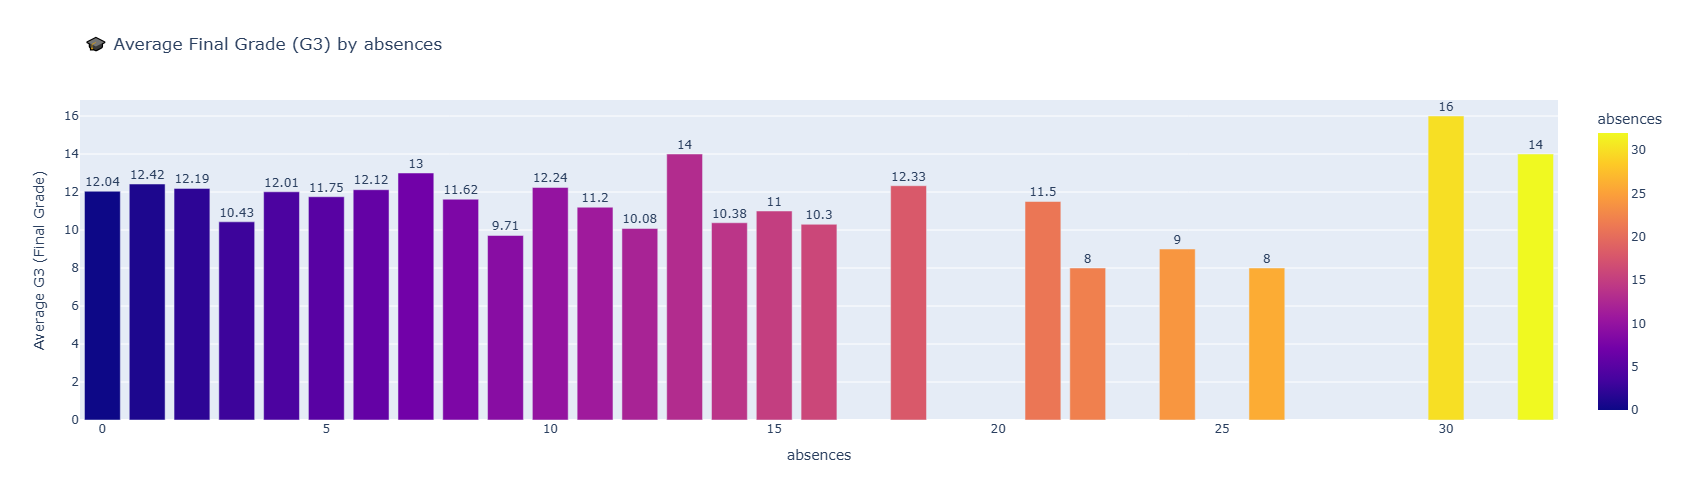

In [38]:
CountPlot('absences')

### **Here we can see that it has exception. Higest no. of absences also has high rank in final exam. so lets analyze further.** 

In [39]:
data['absences'].unique()

array([ 4,  2,  6,  0, 10,  8, 16, 14,  1, 12, 24, 22, 32, 30, 21, 15,  9,
       18, 26,  7, 11,  5, 13,  3])

In [40]:
correlation = data['absences'].corr(data['G3'])
print("Correlation between absences and G3:", correlation)

Correlation between absences and G3: -0.0913790564387562


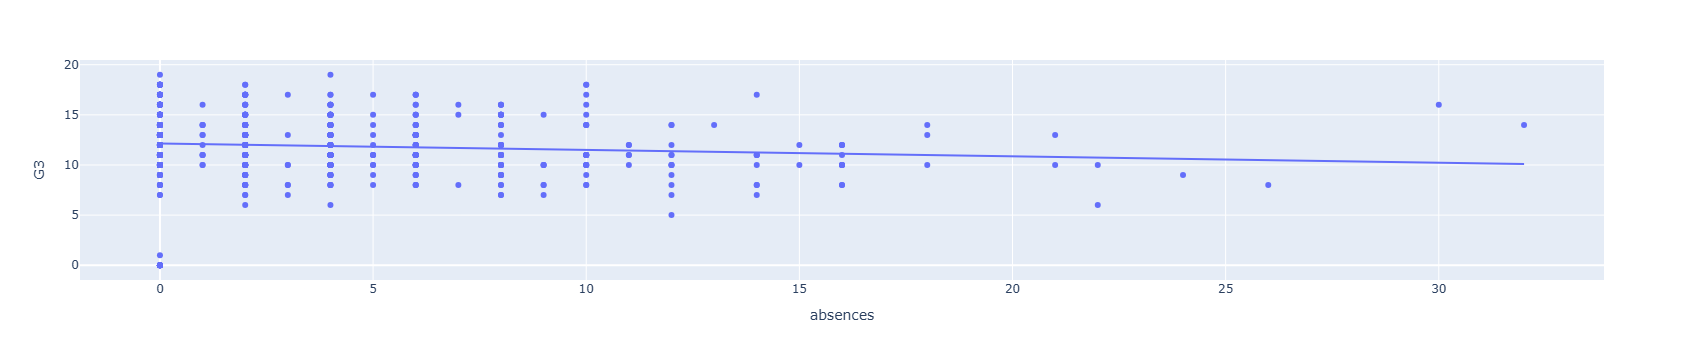

In [41]:
fig = px.scatter(data, x='absences', y='G3', trendline='ols')  # 'ols' = Ordinary Least Squares
fig.show()

# Exceptions

In [42]:
data[data['absences'] == 30]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,absences_bin
212,GP,F,17,U,GT3,T,4,4,services,teacher,home,mother,2,1,1,no,yes,no,no,yes,yes,yes,no,4,2,4,2,3,2,30,14,15,16,20+


In [43]:
data[data['absences'] == 32]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,absences_bin
197,GP,F,17,U,LE3,T,3,3,other,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,yes,5,3,3,2,3,1,32,14,13,14,20+


## **Note**
- Some exceptional students performed well despite having a high number of absences, whereas others with fewer absences did not perform as well.
- Overall, there is **no strong relationship** between **absences** and the **final grade.**
- However, the slight downward slope of the trend line suggests that, for some students, **higher absences may have a negative impact** on performance.
   

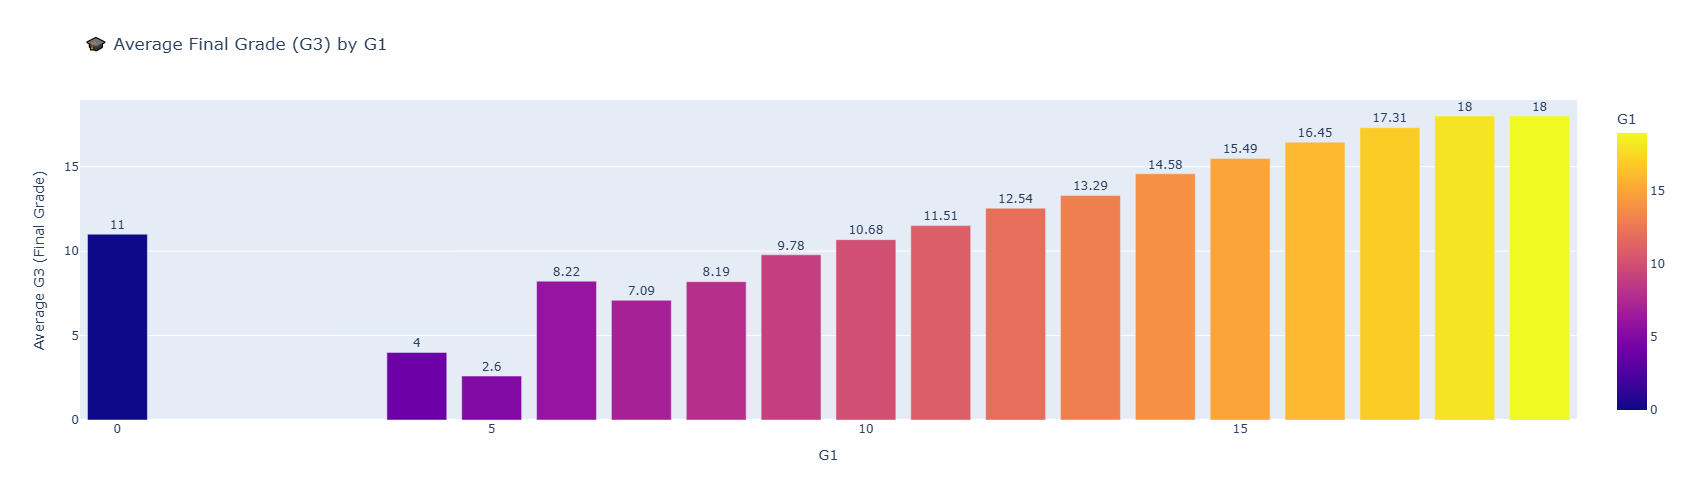

In [44]:
CountPlot('G1')

In [45]:
correlation = data['G1'].corr(data['G3'])
print("Correlation between G1 and G3:", correlation)

Correlation between G1 and G3: 0.8263871247890473


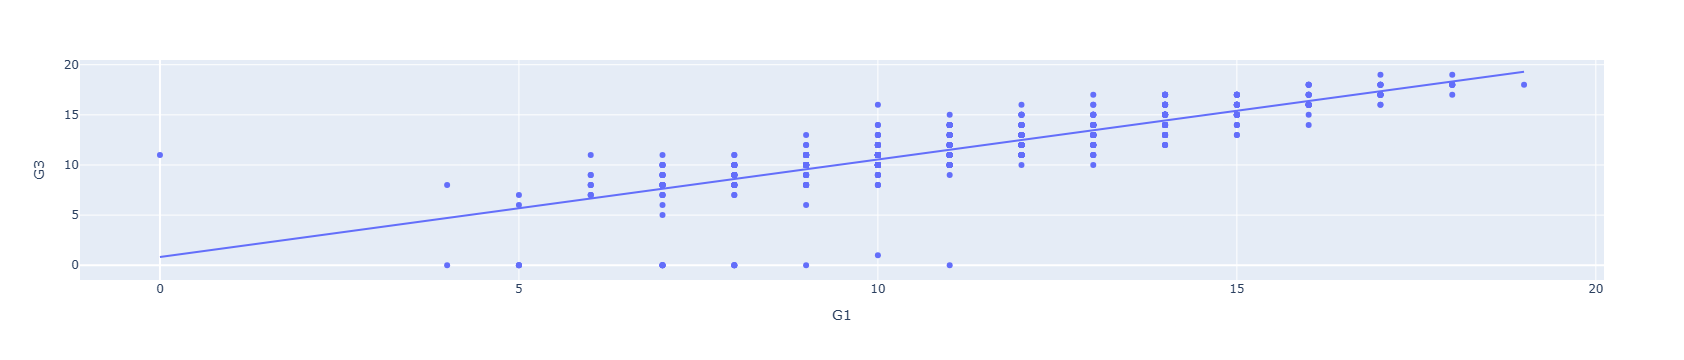

In [46]:
fig = px.scatter(data, x='G1', y='G3', trendline='ols')  # 'ols' = Ordinary Least Squares
fig.show()

## **Correlation Between G1 and G3**

- The correlation coefficient between **G1** (first period grade) and **G3** (final grade) is **0.826**.
- Students who perform well in the first grading period tend to maintain strong performance by the final grade.
- Therefore, **G1 can be considered a good predictor of G3**, and early academic performance plays an important role in final outcomes.


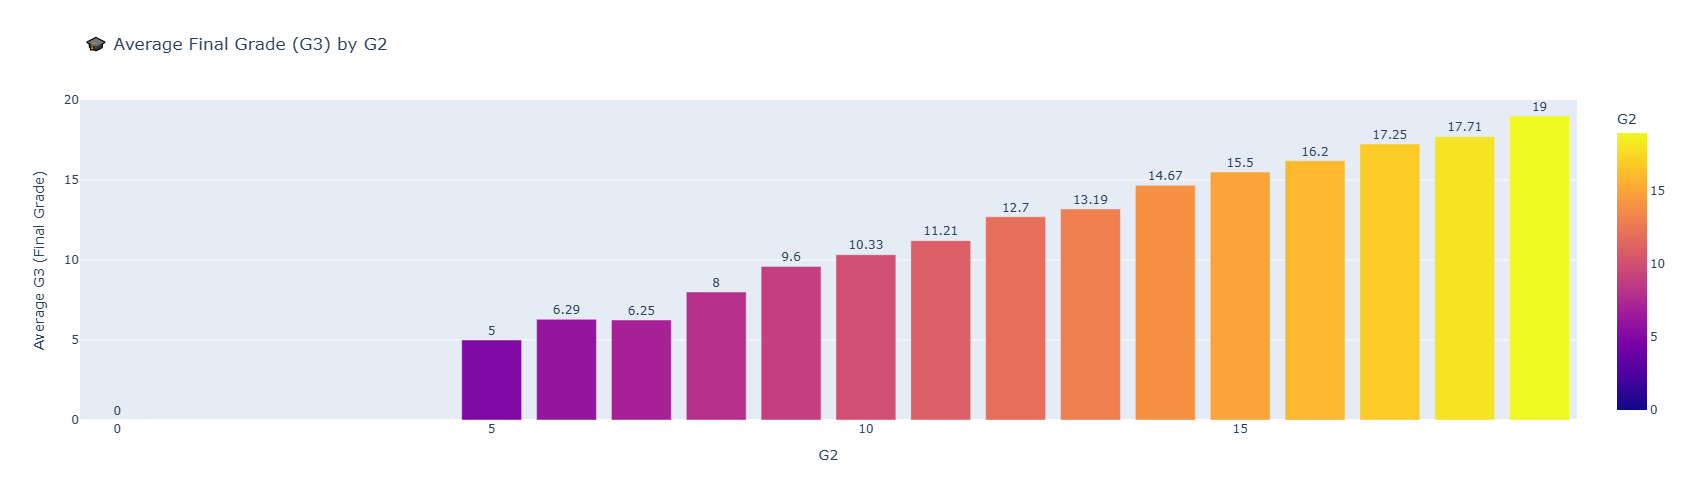

In [47]:
CountPlot('G2')

In [48]:
correlation = data['G2'].corr(data['G3'])
print("Correlation between G2 and G3:", correlation)

Correlation between G2 and G3: 0.9185480035603512


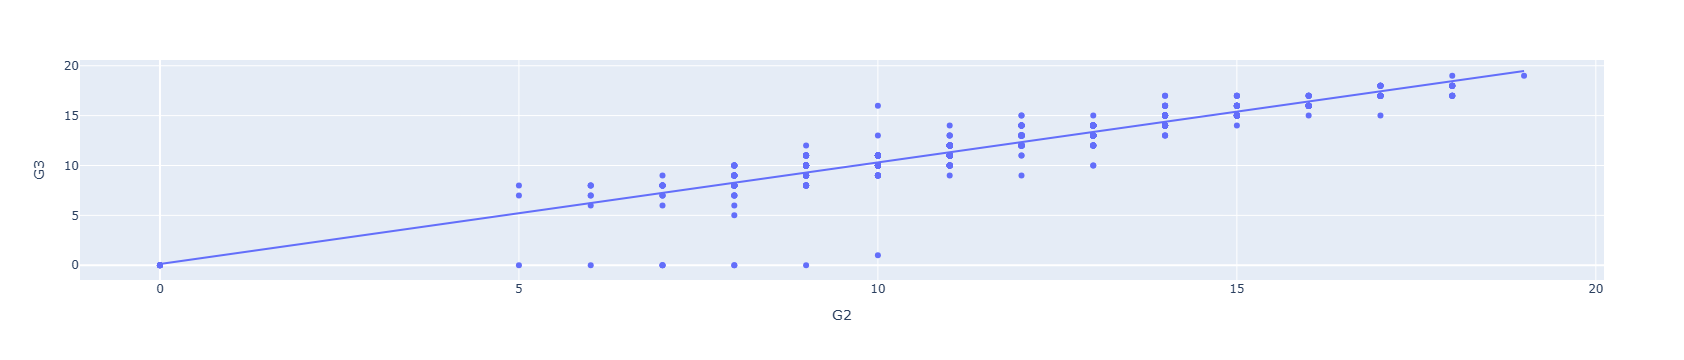

In [49]:
fig = px.scatter(data, x='G2', y='G3', trendline='ols')  # 'ols' = Ordinary Least Squares
fig.show()

### G2 and G3 have a very strong positive correlation of 0.918, indicating that second period performance is a strong predictor of final grades.


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#f0e9d5; font-family: Trebuchet MS; border-left: 5px solid #4CAF50;; padding: 13px;  color: #333; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">Student Performance Analysis Report</div>



### 📅 Dataset Overview:
This report summarizes key findings from the analysis of student academic performance, covering multiple social, behavioral, and academic factors that impact final grades (**G3**). Comparisons are made across demographics, schools, and other influencing variables to provide actionable insights.

---

## 1️⃣ Gender-Based Performance

- **Girls outperform boys on average.**
- Female students consistently achieved **higher average grades** than male students across most categories.

---

## 2️⃣ Family & Guardian Influence

- **Family size** impacts performance:  
  Students from smaller families scored **1 to 1.5 grades higher** on average.

- **Guardian type matters:**  
  Students with **parents as guardians** performed better compared to those with **other guardians** (relatives, others).

- **Parental education level** plays a role:  
  Higher education levels of **both father and mother** correlate with an increase of **~1.5 points in final grades**.

---

## 3️⃣ Time & Lifestyle Factors

- **Travel time to school affects performance:**
  - Students with **longer commutes (~60 minutes)** showed a **noticeable drop in grades**.
  - Recommendation: **Reduce commute time** through better transportation or local school access.

- **Internet access boosts performance:**
  - Students with good internet access had an average grade increase of **1 to 1.5 points**.

- **Romantic relationships correlate negatively:**
  - Students in romantic relationships generally had **lower grades** compared to their peers.

- **Study time matters:**
  - Students who studied **~10 hours/week** had **significantly higher performance** than those who studied less.

- **Alcohol consumption impacts performance:**
  - **Weekday alcohol use** negatively affects academic performance.
  - **Weekend alcohol use** showed **less significant impact**.

---

## 4️⃣ Absences

- **No strong correlation** between number of absences and final grade.
- Some exceptional students performed well despite high absences, and vice versa.
- However, a **slight downward trend** suggests that **frequent absences may affect some students negatively**.

---

## 5️⃣ Academic Progression Analysis

### 📘 G1 (First Period Grade) vs G3 (Final Grade)

- **Correlation: 0.826**
- Strong positive relationship:  
  Students who perform well early in the term tend to maintain performance.

- **Insight:**  
  **G1 is a strong predictor** of final academic outcomes.

---

### 📗 G2 (Second Period Grade) vs G3 (Final Grade)

- **Correlation: 0.918**
- **Very strong positive relationship**
- Students with high G2 scores are **highly likely to succeed** in their final grade.

- **Insight:**  
  **G2 is the best early indicator** of final academic performance among all available predictors.

---

## 6️⃣ School-Wise Comparison: GP vs MS

- **GP students consistently outperform MS students** across all key factors:
  - Higher grades
  - Better attendance
  - Shorter commute times
  - More study hours
  - Greater access to support and internet

### 🔧 Recommendations for MS School

- ✅ **Introduce academic support programs** (like tutoring).
- 🚍 **Reduce student travel time** with better transport options or local resources.
- 💻 **Ensure internet access** for all students.
- 📚 **Encourage study time** and healthy routines.
- 🔍 **Monitor romantic relationships, absences, and lifestyle choices** through mentoring or counseling.

---

## 📌 Key Takeaways

- **G1 and G2 grades** are reliable early indicators of student success.
- **Environmental, social, and behavioral factors** significantly impact student performance.
- **Targeted interventions** in travel, support, internet access, and lifestyle management can improve student outcomes.
